# НПП "Слобожанський". EOS Vision - Аналіз паттернів
Майстер-клас по роботі з Python бібліотеками для аналітики просторових даних. В цілому майстер-клас буде розділений на дві частини: візуалізація даних засобами Python-бібліотек та аналіз паттернів.


## Частина 1. Візуалізація даних

В першу чергу імпортуємо необхідні нам модулі:

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import pysal

Далі ми вказуємо шлях до файлу, перетворюємо його в геодатафрейм та показуємо топ 5 стрічок

In [16]:
path = 'data/admin/ADMIN_3.shp' #вказуємо шлях
df = gpd.read_file(path)
df.head() #відображення перших рядків

,ID,TYPE,NAME_UA,NAME_RUS,NAME_LAT,KOATUU,CODETOPO,CODENAME,KOD_OBL,KOD_RAY,NAME_OBL,NAME_RAY,CODE_PR,SHAPE_Leng,SHAPE_Area,POPULATION,Area_km,geometry
0,17.0,Межі рад,Тінистівська,Тенистовский,Tinystivska,0120486200,81230300,сільська рада,0100000000,0120400000,Автономна Республіка Крим,Бахчисарайський район,None,0.436559,0.006456,2936.0,0.0,"POLYGON ((33.73191799991667 44.74081799985174,..."
1,32.0,Межі рад,Уютненська,Уютненский,Uiutnenska,0124387700,81230300,сільська рада,0100000000,0124300000,Автономна Республіка Крим,Сакський район,None,0.380963,0.005505,3853.0,0.0,"POLYGON ((33.32357857569161 45.23328144538328,..."
2,33.0,Межі рад,Марфівська,Марфовский,Marfivska,0122785100,81230300,сільська рада,0100000000,0122700000,Автономна Республіка Крим,Ленінський район,None,0.856536,0.021117,1342.0,0.0,"POLYGON ((36.16702299971257 45.23341800024144,..."
3,34.0,Межі рад,Медведівська,Медведевский,Medvedivska,0121183400,81230300,сільська рада,0100000000,0121100000,Автономна Республіка Крим,Джанкойський район,None,0.884262,0.008810,2389.0,0.0,(POLYGON ((34.56049538355597 45.98802119842048...
4,35.0,Межі рад,Олексіївська,Алексеевский,Oleksiivska,0123580100,81230300,сільська рада,0100000000,0123500000,Автономна Республіка Крим,Первомайський район,None,0.654769,0.017784,1417.0,0.0,"POLYGON ((33.75240300119845 45.61398399896331,..."


Швидка візуалізація геодатафрейму

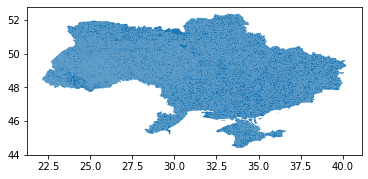

In [17]:
df.plot(figsize=(6, 6))
plt.show()

Фільтрація даних за значенням колонки

In [21]:
kh = df.loc[df['NAME_OBL'] == 'Харківська область']

Відображення системи координат геодатафрейму

In [22]:
kh.crs

{'init': 'epsg:4326'}

Фільтрація даних: вибір колонок

In [9]:
kh_data = kh[['NAME_UA','POPULATION','geometry']]
kh_data.head()

,NAME_UA,POPULATION,geometry
6355,Вірнопільська,862.0,"POLYGON ((37.20094099972823 49.06865499972935,..."
6356,Веселівська,2334.0,"POLYGON ((37.2349899987903 49.54161900021762, ..."
6357,Новомиколаївська,1178.0,"POLYGON ((36.84315900038843 49.11473000029019,..."
6358,Власівська,711.0,"POLYGON ((35.80539399923458 49.4835719997489, ..."
6359,Алісівська,733.0,"POLYGON ((36.68689699879837 49.02878100004403,..."


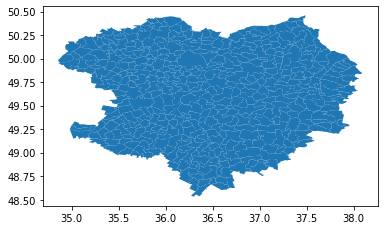

In [10]:
kh_data.plot(figsize=(6, 6))
plt.show()

Відображення стилізованих даних

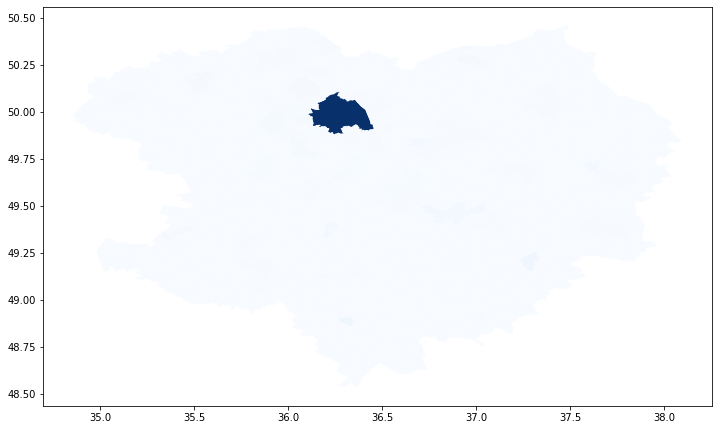

In [11]:
kh_data.plot(column='POPULATION', cmap='Blues', figsize=(12, 12))

Зміна підходу до стилізації, додавання легенди

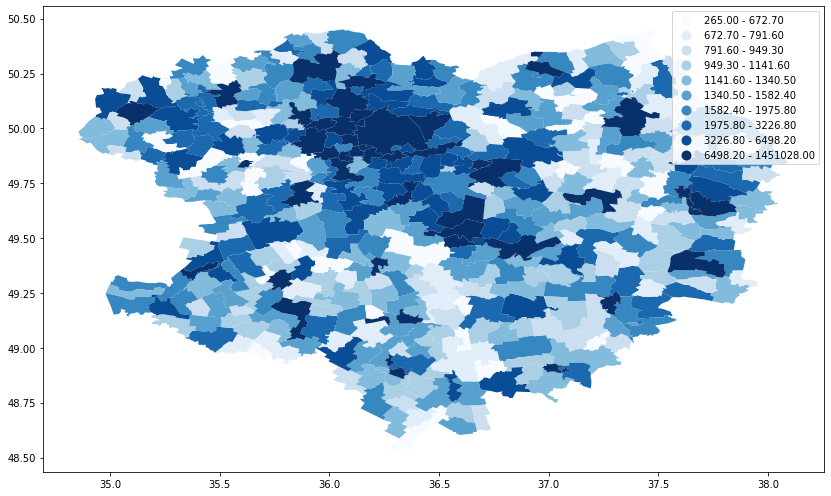

In [14]:
kh_data.plot(column='POPULATION', cmap='Blues', scheme='quantiles', k=10, legend=True, figsize=(14, 14))

Видалення створених датафреймів

In [24]:
del kh
del kh_data
del df